In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

607

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2ef4f573deb6234c0deff1a98f65f8a3


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

ord 49 of Set 3 | chara
Processing Record 50 of Set 3 | fare
Processing Record 1 of Set 4 | coahuayana
Processing Record 2 of Set 4 | constitucion
Processing Record 3 of Set 4 | altoona
Processing Record 4 of Set 4 | auburn
Processing Record 5 of Set 4 | dunedin
Processing Record 6 of Set 4 | eastlake
Processing Record 7 of Set 4 | nome
Processing Record 8 of Set 4 | baykit
Processing Record 9 of Set 4 | bodden town
Processing Record 10 of Set 4 | mizan teferi
Processing Record 11 of Set 4 | aksu
Processing Record 12 of Set 4 | antofagasta
Processing Record 13 of Set 4 | mayo
Processing Record 14 of Set 4 | kavieng
Processing Record 15 of Set 4 | bambous virieux
Processing Record 16 of Set 4 | new norfolk
Processing Record 17 of Set 4 | iralaya
Processing Record 18 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 19 of Set 4 | chalus
Processing Record 20 of Set 4 | yei
Processing Record 21 of Set 4 | grindavik
Processing Record 22 of Set 4 | port elizabeth
Process

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Noyabrsk,63.1994,75.4507,-26.90,86,81,9.95,RU,2021-01-27 03:24:53
1,Svetlogorsk,52.6333,29.7333,30.60,96,99,17.83,BY,2021-01-27 03:24:53
2,Daru,-9.0763,143.2092,86.72,70,91,10.13,PG,2021-01-27 03:24:54
3,Koutiala,12.3917,-5.4642,67.19,21,90,9.57,ML,2021-01-27 03:24:54
4,Beruwala,6.4788,79.9828,74.89,73,81,5.75,LK,2021-01-27 03:24:54
5,Rikitea,-23.1203,-134.9692,80.53,71,26,8.05,PF,2021-01-27 03:24:54
6,Sao Mateus,-18.7161,-39.8589,73.22,88,100,3.29,BR,2021-01-27 03:24:54
7,Gat,31.6100,34.7642,54.00,28,100,1.01,IL,2021-01-27 03:20:04
8,Thanh Hoa,19.8000,105.7667,75.13,62,90,1.36,VN,2021-01-27 03:24:55
9,Prince Rupert,54.3161,-130.3201,35.60,80,1,5.75,CA,2021-01-27 03:24:55


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Noyabrsk,RU,2021-01-27 03:24:53,63.1994,75.4507,-26.90,86,81,9.95
1,Svetlogorsk,BY,2021-01-27 03:24:53,52.6333,29.7333,30.60,96,99,17.83
2,Daru,PG,2021-01-27 03:24:54,-9.0763,143.2092,86.72,70,91,10.13
3,Koutiala,ML,2021-01-27 03:24:54,12.3917,-5.4642,67.19,21,90,9.57
4,Beruwala,LK,2021-01-27 03:24:54,6.4788,79.9828,74.89,73,81,5.75
5,Rikitea,PF,2021-01-27 03:24:54,-23.1203,-134.9692,80.53,71,26,8.05
6,Sao Mateus,BR,2021-01-27 03:24:54,-18.7161,-39.8589,73.22,88,100,3.29
7,Gat,IL,2021-01-27 03:20:04,31.6100,34.7642,54.00,28,100,1.01
8,Thanh Hoa,VN,2021-01-27 03:24:55,19.8000,105.7667,75.13,62,90,1.36
9,Prince Rupert,CA,2021-01-27 03:24:55,54.3161,-130.3201,35.60,80,1,5.75


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

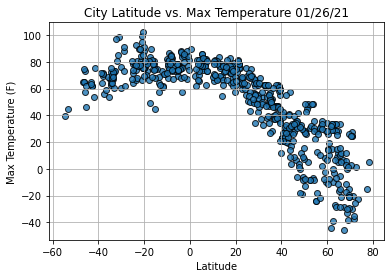

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()